<a href="https://colab.research.google.com/github/SandakaEswaraSaiManikanta/numpy/blob/main/Walmart_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2024-06-02 13:21:57--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.173, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094.2’

walmart_data.csv?16 100%[===================>]  21.96M  89.3MB/s    in 0.2s    

2024-06-02 13:21:57 (89.3 MB/s) - ‘walmart_data.csv?1641285094.2’ saved [23027994/23027994]



In [ ]:
data=pd.read_csv('walmart_data.csv?1641285094')

## 1. Basic structure and Characteristics of the data

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.shape

(550068, 10)

In [ ]:
data['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
data_copy= data[:]
data_copy

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
def func(x):
  if x =='A':
    x=1
  elif x =='B':
    x=2
  else:
    x=3
  return x

data_copy['City_Category'] = data_copy['City_Category'].apply(func)
data_copy


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,1,2,0,3,8370
1,1000001,P00248942,F,0-17,10,1,2,0,1,15200
2,1000001,P00087842,F,0-17,10,1,2,0,12,1422
3,1000001,P00085442,F,0-17,10,1,2,0,12,1057
4,1000002,P00285442,M,55+,16,3,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,2,1,1,20,368
550064,1006035,P00375436,F,26-35,1,3,3,0,20,371
550065,1006036,P00375436,F,26-35,15,2,4+,1,20,137
550066,1006038,P00375436,F,55+,1,3,2,0,20,365


In [ ]:
def func(x):
  if x =='F':
    x=0
  else:
    x=1
  return x

data_copy['Gender'] = data_copy['Gender'].apply(func)
data_copy

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,0,0-17,10,1,2,0,3,8370
1,1000001,P00248942,0,0-17,10,1,2,0,1,15200
2,1000001,P00087842,0,0-17,10,1,2,0,12,1422
3,1000001,P00085442,0,0-17,10,1,2,0,12,1057
4,1000002,P00285442,1,55+,16,3,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,2,1,1,20,368
550064,1006035,P00375436,0,26-35,1,3,3,0,20,371
550065,1006036,P00375436,0,26-35,15,2,4+,1,20,137
550066,1006038,P00375436,0,55+,1,3,2,0,20,365


In [ ]:
data_copy['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [ ]:
data_copy.describe()

,User_ID,Gender,Occupation,City_Category,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,0.753105,8.076707,2.042640,0.409653,5.404270,9263.968713
std,1.727592e+03,0.431205,6.522660,0.760211,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,1.000000,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,1.000000,14.000000,3.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,1.000000,20.000000,3.000000,1.000000,20.000000,23961.000000


2. Detect Null values and outliers

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No null values present in the given dataset.

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: ylabel='Purchase'>

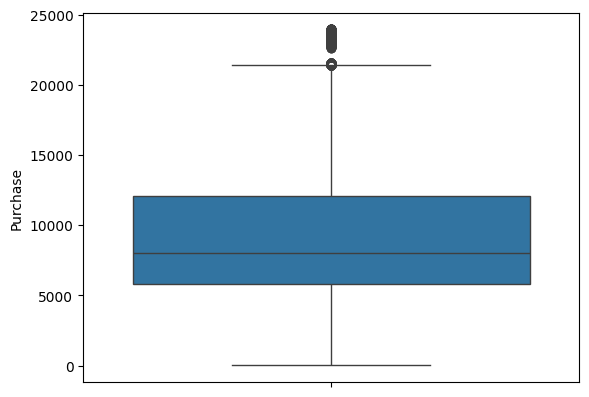

In [ ]:
sns.boxplot(data['Purchase'])

<Axes: xlabel='Purchase', ylabel='Count'>

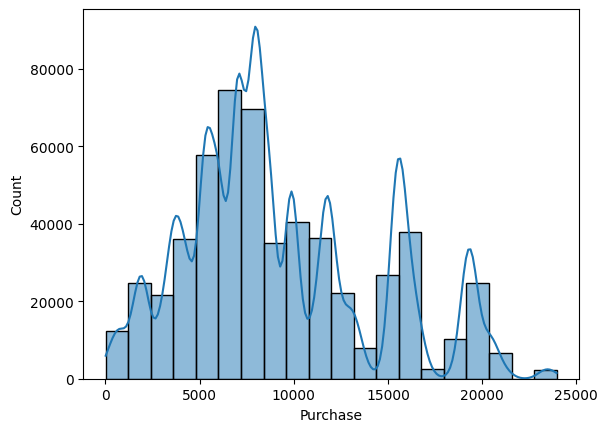

In [ ]:
sns.histplot(data['Purchase'],bins=20,kde=True)

## 3. Data Exploration


<Axes: xlabel='Product_Category', ylabel='Count'>

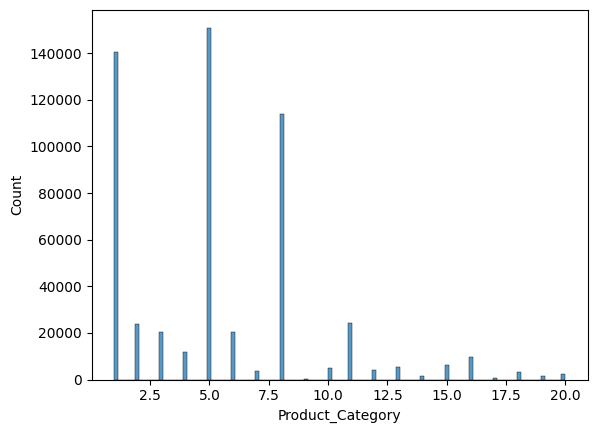

In [ ]:
sns.histplot(data['Product_Category'])

In [ ]:
data.groupby('Age')['Product_Category'].value_counts()

Age   Product_Category
0-17  5                   4330
      1                   3585
      8                   2258
      3                   1200
      2                    805
                          ... 
55+   7                    134
      19                   103
      14                    75
      17                    67
      9                      8
Name: count, Length: 140, dtype: int64

In [ ]:
pd.crosstab(data['Age'],data['Purchase'].sum())

col_0,5095812742
Age,
0-17,15102
18-25,99660
26-35,219587
36-45,110013
46-50,45701
51-55,38501
55+,21504


b. Is there a relationship between age, marital status, and the amount spent?


In [ ]:
test=ols('Purchase~C(Age)*C(Marital_Status)',data=data).fit()
anova_table=sm.stats.anova_lm(test,type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Age),6.0,6.140003e+09,1.023334e+09,40.585089,1.025085e-49
C(Marital_Status),1.0,4.487707e+08,4.487707e+08,17.798104,2.456672e-05
C(Age):C(Marital_Status),6.0,2.926696e+09,4.877826e+08,19.345303,1.094289e-22
Residual,550055.0,1.386938e+13,2.521453e+07,NaN,NaN


c. Are there preferred product categories for different genders?


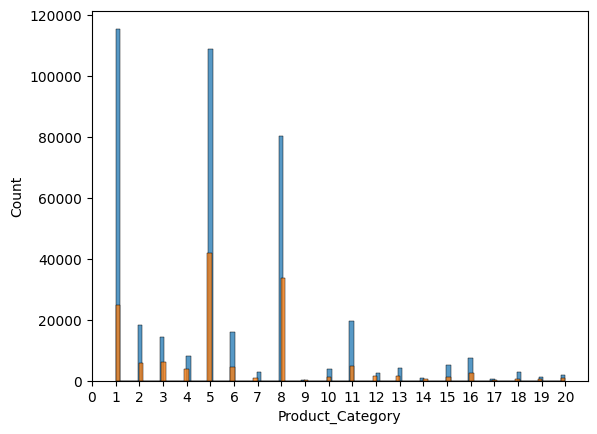

In [ ]:
sns.histplot(data[data['Gender']=='M']['Product_Category'])
sns.histplot(data[data['Gender']=='F']['Product_Category'])
plt.xticks(range(0,21))
plt.show()

##4. How does gender affect the amount spent?

In [ ]:
data.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

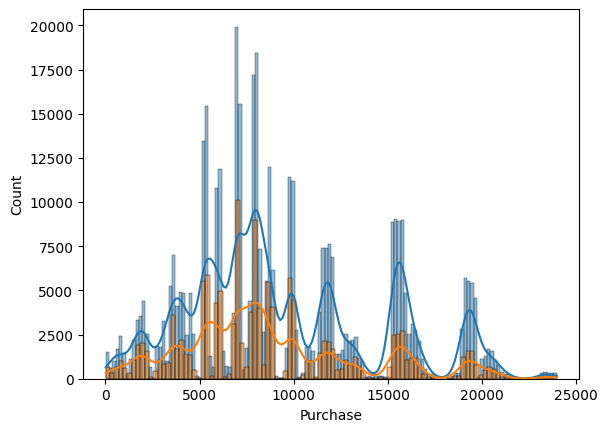

In [ ]:
sns.histplot(data[data['Gender']=='M']['Purchase'],kde=True)
sns.histplot(data[data['Gender']=='F']['Purchase'],kde=True)

 Using the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per gender

In [ ]:
data_male=data[data['Gender']=='M']
data_female=data[data['Gender']=='F']

male_mean=data_male['Purchase'].mean()
female_mean=data_female['Purchase'].mean()
male_std=data_male['Purchase'].std()
female_std=data_female['Purchase'].std()
print('male_mean:',male_mean,'female_mean:',female_mean,'male_std:',male_std,'female_std:',female_std)

male_mean: 9437.526040472265 female_mean: 8734.565765155476 male_std: 5092.18620977797 female_std: 4767.233289291458


In [ ]:
# confidence_interval_male
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)
no_samples= data_male['Purchase'].count()
confidence_interval1= male_mean+(z1*(male_std/np.sqrt(no_samples)))
confidence_interval2= male_mean+(z2*(male_std/np.sqrt(no_samples)))
print(male_mean)
print(z1,z2)
print(confidence_interval1,confidence_interval2)

9437.526040472265
-1.9599639845400545 1.959963984540054
9422.01944736257 9453.032633581959


In [ ]:
# confidence_interval_malez1=norm.ppf(0.025)
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)
no_samples= data_female['Purchase'].count()
confidence_interval1= female_mean+(z1*(female_std/np.sqrt(no_samples)))
confidence_interval2= female_mean+(z2*(female_std/np.sqrt(no_samples)))
print(female_mean)
print(z1,z2)
print(confidence_interval1,confidence_interval2)

8734.565765155476
-1.9599639845400545 1.959963984540054
8709.21154714068 8759.919983170272


In [ ]:
from scipy.stats import norm

def confidence_interval(mean,sample_mean,std,no_samples,Confidence_level):
  x=(1-Confidence_level/100)/2
  z1=norm.ppf(x)
  z2=norm.ppf(1-x)
  print('z1:', z1,'z2:',z2)
  z=(sample_mean-mean)/(std/np.sqrt(no_samples))
  print('z:',z)
  p_val= norm.cdf(z)
  print('p-val:',p_val)
  alpha=0.05
  if p_val < alpha:
    print('Reject H0')
  else:
    print('Fail to Reject H0')
  confidence_interval1= sample_mean+(z1*(std/np.sqrt(no_samples)))
  confidence_interval2= sample_mean+(z2*(std/np.sqrt(no_samples)))
  return confidence_interval1,confidence_interval2

In [ ]:
# using CLT
# male_sample 30
np.random.seed(42)
Confidence_level =95
no_samples=30
sample_30= data_male['Purchase'].sample(30)
sample_mean= np.mean(sample_30)
print('sample_mean:',sample_mean)
print('male_mean:',male_mean)
confidence_interval(male_mean,sample_mean,male_std,no_samples,Confidence_level)

sample_mean: 10292.6
male_mean: 9437.526040472265
z1: -1.959963984540054 z2: 1.959963984540054
z: 0.9197293199319608
p-val: 0.8211428865857919
Fail to Reject H0


(8470.418050949598, 12114.781949050403)

In [ ]:
# using CLT
# female_sample 30
np.random.seed(42)
Confidence_level =95
no_samples=30
sample_30= data_female['Purchase'].sample(30)
sample_mean= np.mean(sample_30)
print('sample_mean:',sample_mean)
confidence_interval(female_mean,sample_mean,female_std,no_samples,Confidence_level)

sample_mean: 9127.7
z1: -1.959963984540054 z2: 1.959963984540054
z: 0.4516843952981449
p-val: 0.6742518192550652
Fail to Reject H0


(7421.79882341325, 10833.601176586752)

In [ ]:
# male_sample 300
np.random.seed(42)
Confidence_level =95
no_samples=300
sample_300= data_male['Purchase'].sample(300)
sample_mean= np.mean(sample_300)
print('sample_mean:',sample_mean)
confidence_interval(male_mean,sample_mean,male_std,no_samples,Confidence_level)

sample_mean: 9887.723333333333
z1: -1.959963984540054 z2: 1.959963984540054
z: 1.5312962891420567
p-val: 0.9371519088619855
Fail to Reject H0


(9311.498806308917, 10463.94786035775)

In [ ]:
# female_sample 300
np.random.seed(42)
Confidence_level =95
no_samples=300
sample_300= data_female['Purchase'].sample(300)
sample_mean= np.mean(sample_300)
print('sample_mean:',sample_mean)
confidence_interval(female_mean,sample_mean,female_std,no_samples,Confidence_level)

sample_mean: 8867.45
z1: -1.959963984540054 z2: 1.959963984540054
z: 0.48280046792054604
p-val: 0.6853812907305894
Fail to Reject H0


(8327.996681882478, 9406.903318117524)

In [ ]:
# male_sample 3000
np.random.seed(42)
Confidence_level =95
no_samples=3000
sample_3000= data_male['Purchase'].sample(3000)
sample_mean= np.mean(sample_3000)
print('sample_mean:',sample_mean)
confidence_interval(male_mean,sample_mean,male_std,no_samples,Confidence_level)

sample_mean: 9645.636
z1: -1.959963984540054 z2: 1.959963984540054
z: 2.238459368511545
p-val: 0.9874044428857404
Fail to Reject H0


(9463.41780509496, 9827.854194905041)

In [ ]:
# female_sample 3000
np.random.seed(42)
Confidence_level =95
no_samples=3000
sample_3000= data_female['Purchase'].sample(3000)
sample_mean= np.mean(sample_3000)
print('sample_mean:',sample_mean)
confidence_interval(female_mean,sample_mean,female_std,no_samples,Confidence_level)

sample_mean: 8806.513666666666
z1: -1.959963984540054 z2: 1.959963984540054
z: 0.8266322672179507
p-val: 0.795777238681141
Fail to Reject H0


(8635.92354900799, 8977.103784325342)

<Axes: ylabel='Count'>

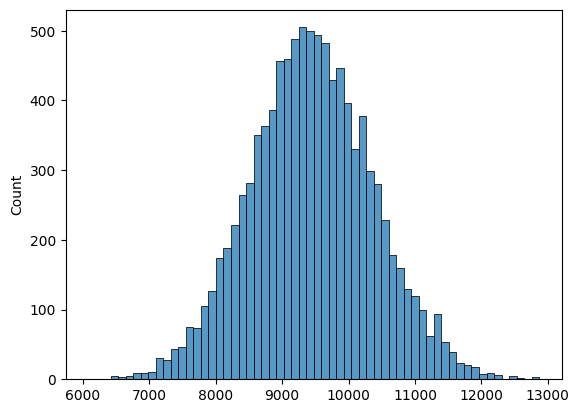

In [ ]:
# bootstraping
# male_Sample 30

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_male['Purchase'],size=30)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

7643.100833333333 11312.768333333333


<Axes: ylabel='Count'>

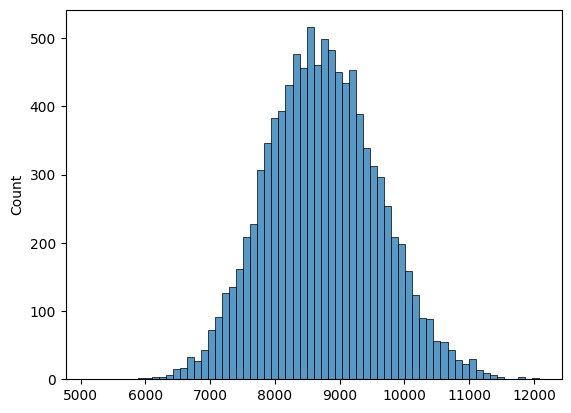

In [ ]:
# bootstraping
# female_Sample 30

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_female['Purchase'],size=30)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

7109.365833333333 10480.259166666667


<Axes: ylabel='Count'>

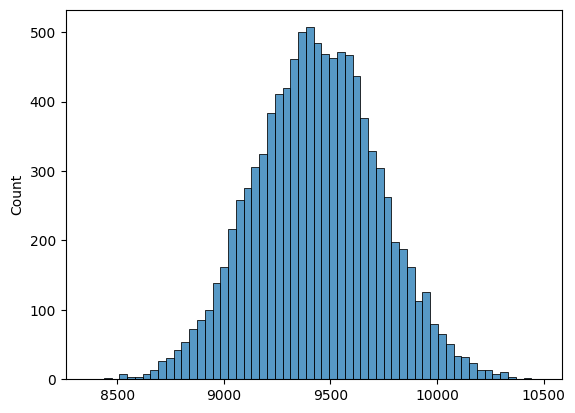

In [ ]:
# bootstraping
# Male_Sample 300

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_male['Purchase'],size=300)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

8868.7085 10009.933833333333


<Axes: ylabel='Count'>

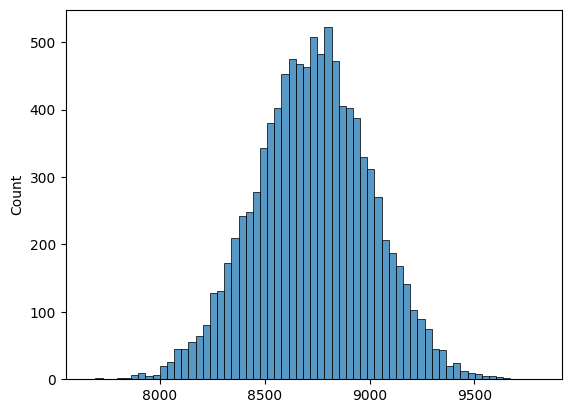

In [ ]:
# bootstraping
#female_Sample 300

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_female['Purchase'],size=300)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

8187.1227499999995 9262.973583333332


<Axes: ylabel='Count'>

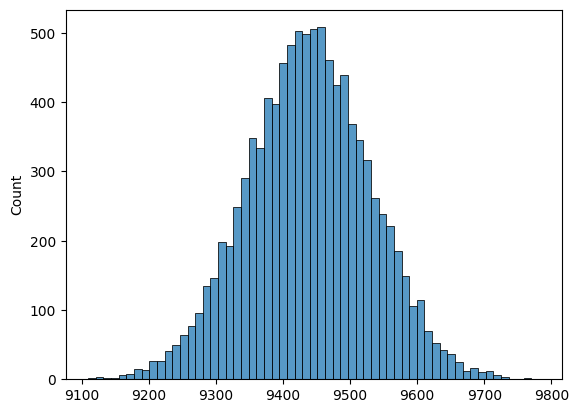

In [ ]:
# bootstraping
# male_Sample 3000

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_male['Purchase'],size=3000)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

9255.925991666667 9617.101891666667


<Axes: ylabel='Count'>

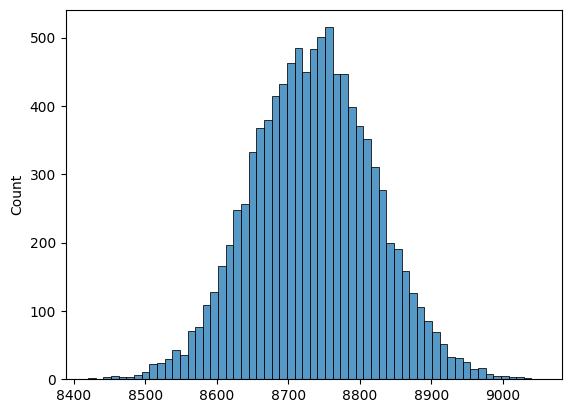

In [ ]:
# bootstraping
# female_Sample 3000

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_female['Purchase'],size=3000)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

8568.064866666666 8903.547083333333



*Observations:*

*  One of the Gender Confidence interval using entire data set is wider as the
females purchased the product worth more than their avg purchase amount
*  As sample size increased the distribution less wider and more near to the mean purchase
*   Confidence intervals overlap as the sample size increases the confidence interval reduces
*   Sample size also affects the distribution, as sample increased the distribution more tends to Normalization.

## 5. How does Marital_Status affect the amount spent?

In [ ]:
data.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

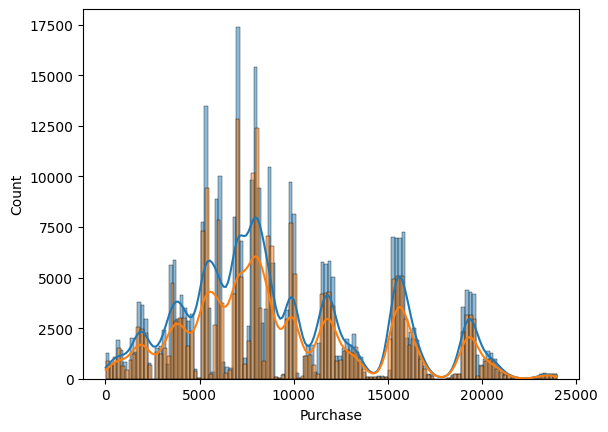

In [ ]:
sns.histplot(data[data['Marital_Status']==0]['Purchase'],kde=True)
sns.histplot(data[data['Marital_Status']==1]['Purchase'],kde=True)

In [ ]:
data_married=data[data['Marital_Status']==1]
data_unmarried=data[data['Marital_Status']==0]

married_mean=data_married['Purchase'].mean()
unmarried_mean=data_unmarried['Purchase'].mean()
married_std=data_married['Purchase'].std()
unmarried_std=data_unmarried['Purchase'].std()
print('married_mean:',married_mean,'unmarried_mean:',unmarried_mean,'married_std:',married_std,'unmarried_std:',unmarried_std)

married_mean: 9261.174574082374 unmarried_mean: 9265.907618921507 married_std: 5016.897377793055 unmarried_std: 5027.347858674449


In [ ]:
# confidence_interval_married
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)
no_samples= data_married['Purchase'].count()
confidence_interval1= married_mean+(z1*(marreid_std/np.sqrt(no_samples)))
confidence_interval2= married_mean+(z2*(marreid_std/np.sqrt(no_samples)))
print(married_mean)
print(z1,z2)
print(confidence_interval1,confidence_interval2)

9261.174574082374
-1.9599639845400545 1.959963984540054
9240.460427057078 9281.888721107669


In [ ]:
# confidence_interval_unmarried
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)
no_samples= data_unmarried['Purchase'].count()
confidence_interval1= unmarried_mean+(z1*(unmarried_std/np.sqrt(no_samples)))
confidence_interval2= unmarried_mean+(z2*(unmarried_std/np.sqrt(no_samples)))
print(unmarried_mean)
print(z1,z2)
print(confidence_interval1,confidence_interval2)

9265.907618921507
-1.9599639845400545 1.959963984540054
9248.61641818668 9283.198819656332


In [ ]:
def confidence_interval(mean,sample_mean,std,no_samples,Confidence_level):
  x=(1-Confidence_level/100)/2
  z1=norm.ppf(x)
  z2=norm.ppf(1-x)
  print('z1:', z1,'z2:',z2)
  z=(sample_mean-mean)/(std/np.sqrt(no_samples))
  print('z:',z)
  p_val= norm.cdf(z)
  print('p-val:',p_val)
  alpha=0.05
  if p_val < alpha:
    print('Reject H0')
  else:
    print('Fail to Reject H0')
  confidence_interval1= sample_mean+(z1*(std/np.sqrt(no_samples)))
  confidence_interval2= sample_mean+(z2*(std/np.sqrt(no_samples)))
  return confidence_interval1,confidence_interval2

In [ ]:
# using CLT
# married_sample 30
np.random.seed(42)
Confidence_level =95
no_samples=30
sample_30= data_married['Purchase'].sample(30)
sample_mean= np.mean(sample_30)
print('sample_mean:',sample_mean)
print('married_mean:',married_mean)
confidence_interval(married_mean,sample_mean,married_std,no_samples,Confidence_level)

sample_mean: 9091.666666666666
married_mean: 9261.174574082374
z1: -1.959963984540054 z2: 1.959963984540054
z: -0.18506119933416335
p-val: 0.4265905171677857
Fail to Reject H0


(7296.425985071207, 10886.907348262124)

In [ ]:
# using CLT
# unmarried_sample 30
np.random.seed(42)
Confidence_level =95
no_samples=30
sample_30= data_unmarried['Purchase'].sample(30)
sample_mean= np.mean(sample_30)
print('sample_mean:',sample_mean)
print('unmarried_mean:',unmarried_mean)
confidence_interval(unmarried_mean,sample_mean,unmarried_std,no_samples,Confidence_level)

sample_mean: 10200.633333333333
unmarried_mean: 9265.907618921507
z1: -1.959963984540054 z2: 1.959963984540054
z: 1.0183706663148617
p-val: 0.8457490814875943
Fail to Reject H0


(8401.65306389947, 11999.613602767196)

In [ ]:
# using CLT
# married_sample 300
np.random.seed(42)
Confidence_level =95
no_samples=300
sample_300= data_married['Purchase'].sample(300)
sample_mean= np.mean(sample_300)
print('sample_mean:',sample_mean)
print('married_mean:',married_mean)
confidence_interval(married_mean,sample_mean,married_std,no_samples,Confidence_level)

sample_mean: 9464.516666666666
married_mean: 9261.174574082374
z1: -1.959963984540054 z2: 1.959963984540054
z: 0.7020251943608683
p-val: 0.7586682742231343
Fail to Reject H0


(8896.81171646319, 10032.221616870143)

In [ ]:
# using CLT
# unmarried_sample 300
np.random.seed(42)
Confidence_level =95
no_samples=300
sample_300= data_unmarried['Purchase'].sample(300)
sample_mean= np.mean(sample_300)
print('sample_mean:',sample_mean)
print('unmarried_mean:',unmarried_mean)
confidence_interval(unmarried_mean,sample_mean,unmarried_std,no_samples,Confidence_level)

sample_mean: 9632.716666666667
unmarried_mean: 9265.907618921507
z1: -1.959963984540054 z2: 1.959963984540054
z: 1.2637516345210555
p-val: 0.8968404071275428
Fail to Reject H0


(9063.829154955227, 10201.604178378107)

In [ ]:
# using CLT
# married_sample 3000
np.random.seed(42)
Confidence_level =95
no_samples=3000
sample_3000= data_married['Purchase'].sample(3000)
sample_mean= np.mean(sample_3000)
print('sample_mean:',sample_mean)
print('married_mean:',married_mean)
confidence_interval(married_mean,sample_mean,married_std,no_samples,Confidence_level)

sample_mean: 9300.768333333333
married_mean: 9261.174574082374
z1: -1.959963984540054 z2: 1.959963984540054
z: 0.43226706558066963
p-val: 0.667226339506383
Fail to Reject H0


(9121.244265173787, 9480.29240149288)

In [ ]:
# using CLT
# unmarried_sample 3000
np.random.seed(42)
Confidence_level =95
no_samples=3000
sample_3000= data_unmarried['Purchase'].sample(3000)
sample_mean= np.mean(sample_3000)
print('sample_mean:',sample_mean)
print('unmarried_mean:',unmarried_mean)
confidence_interval(unmarried_mean,sample_mean,unmarried_std,no_samples,Confidence_level)

sample_mean: 9429.275333333333
unmarried_mean: 9265.907618921507
z1: -1.959963984540054 z2: 1.959963984540054
z: 1.7798685284334443
p-val: 0.9624512603667252
Fail to Reject H0


(9249.377306389946, 9609.17336027672)

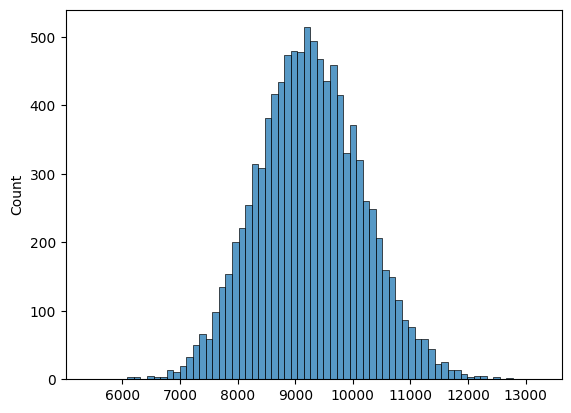

confidence_interval1: 7527.015833333333 confidence_interval2: 11112.470833333333


In [ ]:
# bootstraping
# married_Sample 30

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_married['Purchase'],size=30)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)
plt.show()

confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print('confidence_interval1:',confidence_interval1,'confidence_interval2:',confidence_interval2)

In [ ]:
confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print(confidence_interval1,confidence_interval2)

7527.015833333333 11112.470833333333


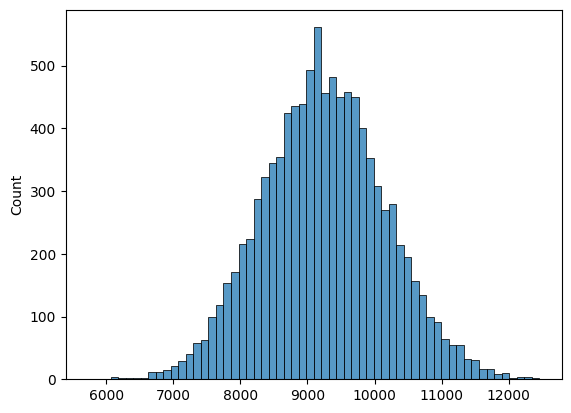

confidence_interval1: 7494.805 confidence_interval2: 11072.8125


In [ ]:
# bootstraping
# unmarried_Sample 30

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_unmarried['Purchase'],size=30)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)
plt.show()

confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print('confidence_interval1:',confidence_interval1,'confidence_interval2:',confidence_interval2)

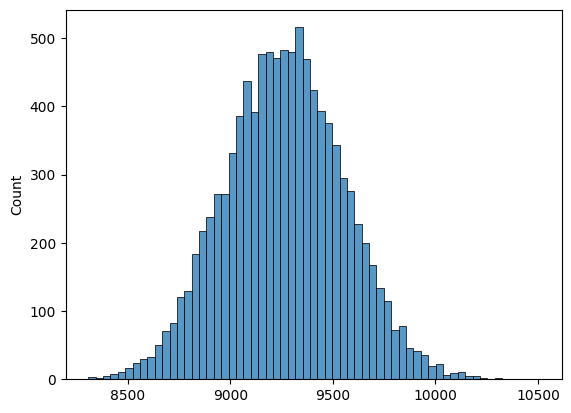

confidence_interval1: 8703.497916666667 confidence_interval2: 9835.271666666666


In [ ]:
# bootstraping
# married_Sample 300

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_married['Purchase'],size=300)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)
plt.show()

confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print('confidence_interval1:',confidence_interval1,'confidence_interval2:',confidence_interval2)

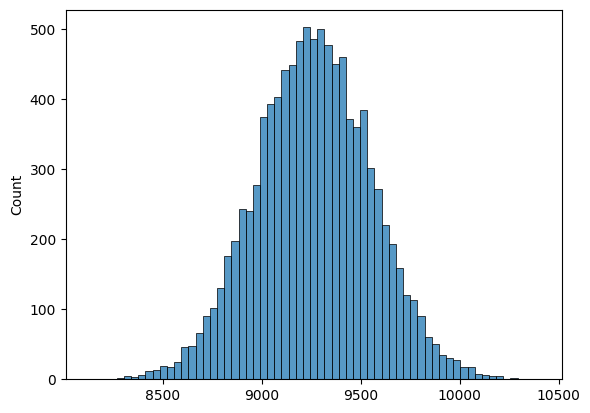

confidence_interval1: 8693.678 confidence_interval1: 9829.886833333334


In [ ]:
# bootstraping
# unmarried_Sample 300

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_unmarried['Purchase'],size=300)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)
plt.show()

confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print('confidence_interval1:',confidence_interval1,'confidence_interval1:',confidence_interval2)

confidence_interval1: 9081.715933333333 confidence_interval1: 9443.693816666666


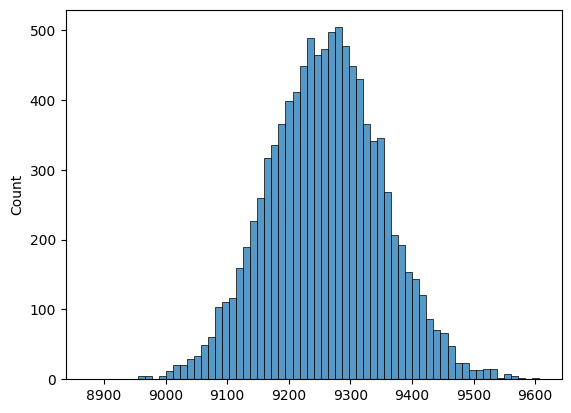

In [ ]:
# bootstraping
# married_Sample 3000

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_married['Purchase'],size=3000)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)

confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print('confidence_interval1:',confidence_interval1,'confidence_interval1:',confidence_interval2)

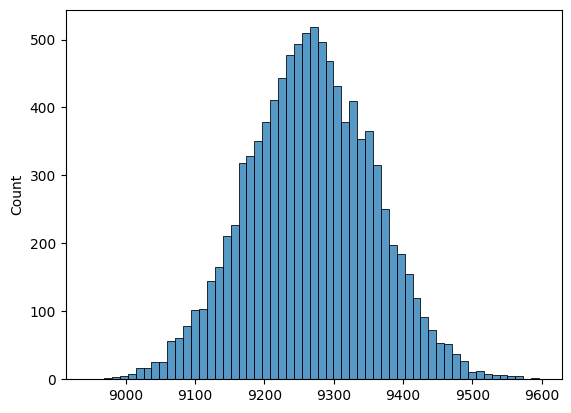

confidence_interval1: 9085.959683333334 confidence_interval2: 9442.35225


In [ ]:
# bootstraping
# unmarried_Sample 3000

bootstrap_means=[]
for i in range(10000):
  bootstap_sample= np.random.choice (data_unmarried['Purchase'],size=3000)
  bootstrap_mean=np.mean(bootstap_sample)
  bootstrap_means.append(bootstrap_mean)

sns.histplot(bootstrap_means)
plt.show()

confidence_interval1=np.percentile(bootstrap_means,2.5)
confidence_interval2=np.percentile(bootstrap_means,97.5)
print('confidence_interval1:',confidence_interval1,'confidence_interval2:',confidence_interval2)

*Observations:*

*  One of the Marital_status Confidence interval using entire data set is wider as the married purchased the product worth more than their avg purchase amount
*  As sample size increased the distribution less wider and more near to the mean purchase
*   Confidence intervals overlap as the sample size increases the confidence interval reduces
*   Sample size also affects the distribution, as sample increased the distribution more tends to Normalization.


# 6. How does Age affect the amount spent?

In [ ]:
data.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

As more categories in Age its better to identify the significant difference exist with one way ANOVA test.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
age_0_17= data[data['Age']=='0-17']['Purchase']
age_18_25= data[data['Age']=='18-25']['Purchase']
age_26_35= data[data['Age']=='26-35']['Purchase']
age_36_45= data[data['Age']=='36-45']['Purchase']
age_46_50= data[data['Age']=='46-50']['Purchase']
age_51_55= data[data['Age']=='51-55']['Purchase']
age_55= data[data['Age']=='55+']['Purchase']

In [ ]:
# H0(Null Hypothesis): No significane diffrent among the age groups for purchase
# H1(Alternative Hypothesis): Siginificant difference in any of the age group for purchase

f_stat,p_val= f_oneway(age_0_17,age_18_25,age_26_35,age_36_45,age_46_50,age_51_55,age_55)
print(f_stat,p_val)

alpha =0.05 # confidence level is 95%

if p_val < alpha:
  print(' Reject H0: Siginificant difference in any of the age group for purchase')
else:
  print('Fail to reject H0: No significane diffrent among the age groups for purchase')

40.57579909450407 1.053563939251671e-49
 Reject H0: Siginificant difference in any of the age group for purchase


In [ ]:
data.groupby('Age')['Product_Category'].value_counts()

Age   Product_Category
0-17  5                   4330
      1                   3585
      8                   2258
      3                   1200
      2                    805
                          ... 
55+   7                    134
      19                   103
      14                    75
      17                    67
      9                      8
Name: count, Length: 140, dtype: int64

## Report and Recommendations

## Gender on Purchase

*  One of the Gender Confidence interval using entire data set is wider as the
females purchased the product worth more than their avg purchase amount
*  As sample size increased the distribution less wider and more near to the mean purchase
*   Confidence intervals overlap as the sample size increases the confidence interval reduces
*   Sample size also affects the distribution, as sample increased the distribution more tends to Normalization.

## Marital_status on purchase

*  No Marital_status Confidence interval using entire data set is wider as the married purchased the product worth more than their avg purchase amount
*  As sample size increased the distribution less wider and more near to the mean purchase
*   Confidence intervals overlap as the sample size increases the confidence interval reduces
*   Sample size also affects the distribution, as sample increased the distribution more tends to Normalization.

## Age on Purchase

*  As per the test we can conclude that, the Age has siginificant impact on the Purchase


## Recommendations
Walmart can leverage with these observation by promoting the female ralated Products for more purchase from the female customers

As unmarreid and married are almost having the same mean and also no siginificant difference in martial status. walmart can ignore the category of marital status as per the data available.

Age having more siginificance in purchasing the product and its category. so its necassary for walmart promote on age group basis

